# Arbeiten mit Text mit NLTK, Textblob und Spacy

Wenn ihr vorher Zeit habt installiert schon mal folgende Pakete:
- ```!pip3 install spacy```
- ```pip install -U textblob```
- ```pip install -U textblob-de```

In [1]:
!python --version

Python 3.9.12


In [7]:
#!pip3 install spacy
#!pip3 install -U textblob
!pip3 install -U textblob-de


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


# Agenda

- Tokenization
- Stemming
- Lemmatization
    - Pattern
    - TextBlob
- POS Tagging
    - Pattern
    - TextBlob
- Stop Word removal
- Wordle 2.0

# Was ist NLTK

- Natural Language Toolkit ist ein sehr praktisches python tool um mit Text zu arbeiten. Früher der quasi standard für viele Aufgaben. 
- Es beinhaltet viele Sprachmodelle und Textsammlungen sog. Corpora.
```nltk.download()```
- http://www.nltk.org
- Es gibt auch ein öffentlich verfügbares freies Buch zu nltk online https://www.nltk.org/book
- ```pip install nltk```

In [2]:
#!conda install nltk -y

In [9]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Wir werden NLTK nutzen um ein paar wichtige Begriffe aus der Textanalyse kennenzulernen

# Tokenizer
- Wie splittet man einfach einen Satz in Wörter auf?
- https://www.admin.ch/opc/de/classified-compilation/19995395/index.html#a8

In [10]:
import nltk
from nltk.tokenize import word_tokenize

In [11]:
artikel = '''Telefonbetrug: «Auch 20- oder 30-Jährige können Opfer werden»
Telefonbetrüger werden zunehmend perfider. Und persönlicher – indem sie Social-Media-Profile abgrasen. Gefeit davor sind auch Junge nicht.
85
03.10.2023, 03:0003.10.2023, 10:44
Anna Kappeler
Anna Kappeler
Folge mir
Mehr «Gesellschaft & Politik»
9-Millionen-Schweiz: So unterschiedlich sind die Auswirkungen in den Regionen
Neuste Umfrage zu den Wahlen: Die SVP legt noch mehr zu – Grüne und FDP brechen ein
Neuste Umfrage zu den Wahlen: Trends unverändert – aber die SVP legt noch mehr zu
Machtkampf im US-Repräsentantenhaus: McCarthys Absetzung beantragt
Promotion
Warum du in SwissShrimp investieren solltest
Promotion
Bahngenuss im Bernina Express - einmalig schön, einmalig günstig

Über zweihunderttausend Franken. So viel hat ein Telefonbetrüger Ende September ergaunert. Und das von einer 34-Jährigen, wie die Kantonspolizei Zürich diesen Montag mitgeteilt hat.

Mehrmals täglich hat ein Unbekannter die Frau aus dem Bezirk Horgen angerufen. Er gab sich als Mitarbeiter von Interpol aus. Ihre Personalien seien gestohlen und damit diverse Betrugsdelikte begangen worden, behauptete dieser. Nun drohe ihr Gefängnis. Ausser, sie arbeite mit den Behörden zusammen und überweise Geld auf ein «sicheres Konto».
8 Millionen Franken ergaunert

Die Frau ist kein Einzelfall. Über acht Millionen Franken haben Telefonbetrüger 2023 bereits ergaunert, wie die Schweizerische Kriminalprävention SKP schreibt. Das sind über 2800 Schockanrufe oder Enkeltrickbetrüge – dreimal so viele Fälle wie im letzten Jahr.
4 von 5 Älteren erlebten Betrugsversuch – die wahre Falle liegt aber nicht beim Enkeltrick

Beunruhigend: «Jüngere sind ebenfalls betroffen, wenngleich der Fokus auf Senioren liegt», sagt Beatrice Kübli, Projektleiterin bei der Schweizerischen Kriminalprävention SKP, zu watson. «Auch 20- oder 30-Jährige können Opfer werden.»
«Jüngere sind ebenfalls betroffen, wenngleich der Fokus auf Senioren liegt.»
Daten im Netz als Infos

Die Betrüger seien oft gut vorbereitet und «haben zuvor beispielsweise via Social Media über die Person recherchiert». So wüssten sie etwa, wenn die Eltern gerade im Ausland in den Ferien seien. «Und das nutzen sie aus», sagt Kübli.

Wir alle hinterliessen so viele Daten im Netz, dass es für Betrüger ein Leichtes sei, an persönliche Informationen zu kommen. Besonders verbreitet sei der sogenannte Schockanruf. «Die Betrüger geben sich etwa als Chefarzt einer Klinik aus und wollen Geld für eine Notoperation der verunfallten Angehörigen.» Die Betrugsgeschichten gleichen sich, sagt Kübli, «egal ob bei jung oder alt». Je nach Situation variiere die Person in vermeintlicher Not, mal sei es die Mutter, mal der Sohn.

«Und ja, das funktioniert auch bei Jungen», sagt Kübli. Im Schock und im Ausnahmezustand sind laut Kübli alle leichtgläubiger und denken weniger rational. Doch sie würden weniger häufig reingelegt. «Generell gilt: Junge lassen sich von Autoritäten weniger schnell einschüchtern», sagt Kübli. «Ein Anruf von einem Chefarzt oder Staatsanwalt beeindruckt eine 35-Jährige weniger als eine 70-Jährige.»
«Hoi Mami, ich habe mein Handy verlegt»

Es begann im Juni mit einer Nachricht auf dem Messenger Signal, erinnert sich die 69-jährige Monika Egli aus Zürich. Die Nummer: unbekannt. Auf Schweizerdeutsch stand sinngemäss:

«Hoi Mami, ich habe mein Handy verlegt. Kannst du mir auf diese Nummer auf WhatsApp schreiben?»

Sie habe sich nicht viel überlegt und das gemacht, sagt Egli, Mutter zweier erwachsener Söhne.

«Mami, mir ist es schaurig peinlich, aber ich habe ein Anliegen. Ich schäme mich etwas, dich zu fragen.»

Dann habe, so Egli, die Person nochmals in zwei Nachrichten in diese Richtung rumgedruckst. Sie habe geantwortet, sie solle endlich sagen, was los sei.

«Ich muss zwei Rechnungen zahlen. Ich gebe dir das Geld sofort am Montag zurück.»

Egli habe nachgefragt, um wie viel Geld es gehe.

«Einmal 4400 Franken. Und einmal 3600 Franken. Ah, und Mami, ich wäre froh, wenn es unter uns bleiben könnte. Weil es mir eben peinlich ist.»

Da sei sie das erste Mal stutzig geworden. «Das ist viel Geld. Zwar veranstaltete einer meiner Söhne zu dieser Zeit gerade ein Pop-up-Restaurant mit Freunden. Dass er Rechnungen zahlen musste, war realistisch», sagt Egli. Doch diese Art, nach Geld zu fragen, habe nicht zu ihrem Sohn gepasst. Egli wollte die Sache zuerst mit dem Ehemann besprechen. Darum schlug sie dem vermeintlichen Sohn vor, zu telefonieren – worauf nur zurückkam:

«Wie viel Geld könntest du mir denn überweisen?»

Als Eglis Mann von der Geschichte erfuhr, habe er sofort auf die echte Nummer des Sohnes angerufen. «Zum Glück hat dieser abgenommen, und so ist der Schwindel aufgeflogen.» Egli hat die Nummer blockiert, bei WhatsApp gemeldet und schliesslich gelöscht.

Am nächsten Morgen kam eine Nachricht. Wieder von einer unbekannten Nummer.

«Mami?»

Diese neue Nachricht hat Egli wiederum sofort gemeldet, den Kontakt blockiert und gelöscht.

Noch heute macht es Egli nachdenklich, wenn sie an den Vorfall zurückdenkt. «Das war schon dreist, ich war ziemlich erschüttert», sagt sie.
Deutlich mehr Schaden

Was Egli erlebt hat, passt in ein Muster. Beinahe vier von fünf Menschen über 55 haben laut einer aktuellen Studie von Pro Senectute in den letzten fünf Jahren einen Betrugsversuch erlebt. Knapp ein Fünftel der Befragten fielen gemäss der Erhebung einem Betrug zum Opfer.

Am meisten überrascht hat Peter Burri Follath von Pro Senectute: «Uns ist die deutliche Erhöhung der jährlichen Schadenssumme um zwei Drittel gegenüber 2018 aufgefallen – von 400 auf 675 Millionen Franken», sagt er zu watson.
Bild

Er stelle eine Diskrepanz zwischen der öffentlichen Wahrnehmung und den effektiv begangenen Straftaten fest: In den Medien sei oft von Enkeltrick und falschen Polizisten zu lesen.
«Von wesentlich höherer Bedeutung sind jedoch die Betrugssummen bei Delikten, bei denen eine Abhängigkeit zu professionellen oder nahestehenden Personen besteht.»
Peter Burri Follath, Mediensprecher Pro Senectute

Am meisten Schaden verursache der Missbrauch einer Vertrauensbeziehung durch eine Fachkraft. Und der Missbrauch einer Vollmacht beziehungsweise des Zugangs zu einem Bankkonto.
Was tun?

Kübli von der Schweizerischen Kriminalprävention empfiehlt genau das, was Eglis getan haben: «Das Telefon auflegen und bei den Angehörigen nachfragen.»

Und beim Fall 1 der 34-Jährigen und dem falschen Interpol-Mitarbeiter rät sie, sich nicht unter Druck setzen zu lassen. Weiter gelte es, betrügerische Anrufe zu unterbrechen. Und: niemals Geld zu überweisen oder an der Türe zu übergeben.

Zuletzt sei es wichtig, solche Anrufe – und auch Betrugsversuche – umgehend der Polizei zu melden.
'''

In [12]:
#verfassung = verfassung.decode('utf-8')
artikel

'Telefonbetrug: «Auch 20- oder 30-Jährige können Opfer werden»\nTelefonbetrüger werden zunehmend perfider. Und persönlicher – indem sie Social-Media-Profile abgrasen. Gefeit davor sind auch Junge nicht.\n85\n03.10.2023, 03:0003.10.2023, 10:44\nAnna Kappeler\nAnna Kappeler\nFolge mir\nMehr «Gesellschaft & Politik»\n9-Millionen-Schweiz: So unterschiedlich sind die Auswirkungen in den Regionen\nNeuste Umfrage zu den Wahlen: Die SVP legt noch mehr zu – Grüne und FDP brechen ein\nNeuste Umfrage zu den Wahlen: Trends unverändert – aber die SVP legt noch mehr zu\nMachtkampf im US-Repräsentantenhaus: McCarthys Absetzung beantragt\nPromotion\nWarum du in SwissShrimp investieren solltest\nPromotion\nBahngenuss im Bernina Express - einmalig schön, einmalig günstig\n\nÜber zweihunderttausend Franken. So viel hat ein Telefonbetrüger Ende September ergaunert. Und das von einer 34-Jährigen, wie die Kantonspolizei Zürich diesen Montag mitgeteilt hat.\n\nMehrmals täglich hat ein Unbekannter die Frau au

### In einzelne Wörter + Zeichen

In [13]:
tokens = nltk.word_tokenize(artikel)
tokens[0:20]

['Telefonbetrug',
 ':',
 '«',
 'Auch',
 '20-',
 'oder',
 '30-Jährige',
 'können',
 'Opfer',
 'werden',
 '»',
 'Telefonbetrüger',
 'werden',
 'zunehmend',
 'perfider',
 '.',
 'Und',
 'persönlicher',
 '–',
 'indem']

### In NUR Wörter

In [22]:
"Plott".isalpha()

True

In [33]:
from nltk.tokenize import word_tokenize
words = word_tokenize(artikel)
words=[word.lower() for word in words if word.isalpha()]
words[0:20]

['telefonbetrug',
 'auch',
 'oder',
 'können',
 'opfer',
 'werden',
 'telefonbetrüger',
 'werden',
 'zunehmend',
 'perfider',
 'und',
 'persönlicher',
 'indem',
 'sie',
 'abgrasen',
 'gefeit',
 'davor',
 'sind',
 'auch',
 'junge']

In [30]:
"asd".isalnum()

True

### Hier noch ein paar praktische Python funktionen wie isalpha

|  s.startswith(t) | test if s starts with t |
|  ------ | ------ |
|  s.endswith(t) | test if s ends with t |
|  t in s | test if t is a substring of s |
|  s.islower() | test if s contains cased characters and all are lowercase |
|  s.isupper() | test if s contains cased characters and all are uppercase |
|  s.isalpha() | test if s is non-empty and all characters in s are alphabetic |
|  s.isalnum() | test if s is non-empty and all characters in s are alphanumeric |
|  s.isdigit() | test if s is non-empty and all characters in s are digits |
|  s.istitle() | test if s contains cased characters and is titlecased (i.e. all words in s have initial capitals) |

### In Sätze

In [39]:
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(artikel)
sentences[0]

'Telefonbetrug: «Auch 20- oder 30-Jährige können Opfer werden»\nTelefonbetrüger werden zunehmend perfider.'

# Stemming
- d.h. das überführen von Wörtern in den gleichen Stamm. 
- Übliche Probleme die Sprache so mit sich bringt:
    - Deklination: gehe, gehst, gehen, geht, ... es handelt sich ja quasi das gleiche Wort - uns sind diese Deklinationen egal. 
    - Plural, Groß/Kleinschreibung: katze, katzen, Katze ... es handelt sich auch um das gleiche Wort. 
    - ...

In [40]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

### Porter stemmer
- geht ganz ok für Englisch
- https://de.wikipedia.org/wiki/Porter-Stemmer-Algorithmus

In [47]:
from nltk.corpus import udhr
engl_words = udhr.words("English-Latin1")
engl_words[0:10]

['Universal',
 'Declaration',
 'of',
 'Human',
 'Rights',
 'Preamble',
 'Whereas',
 'recognition',
 'of',
 'the']

In [42]:
porter.stem("declaration")

'declar'

In [43]:
porter.stem("declaring")

'declar'

In [44]:
porter.stem("declare")

'declar'

In [48]:
[porter.stem(w) for w in engl_words][0:10]

['univers',
 'declar',
 'of',
 'human',
 'right',
 'preambl',
 'wherea',
 'recognit',
 'of',
 'the']

### Lancaster Stemmer
- kommt zu leicht anderen "stämmen"
- funktioniert nicht so gut für Deutsch

In [49]:
[lancaster.stem(w) for w in engl_words][0:10]

['univers',
 'decl',
 'of',
 'hum',
 'right',
 'preambl',
 'wherea',
 'recognit',
 'of',
 'the']

### Snowball stemmer
- Geht okish für deusch
- http://snowball.tartarus.org/algorithms/german/stemmer.html

In [50]:
snowball = nltk.stem.snowball.GermanStemmer()

In [52]:
words[0:10]

['telefonbetrug',
 'auch',
 'oder',
 'können',
 'opfer',
 'werden',
 'telefonbetrüger',
 'werden',
 'zunehmend',
 'perfider']

In [51]:
[snowball.stem(w) for w in words][0:10]

['telefonbetrug',
 'auch',
 'oder',
 'konn',
 'opf',
 'werd',
 'telefonbetrug',
 'werd',
 'zunehm',
 'perfid']

In [53]:
[lancaster.stem(w) for w in words][0:10]

['telefonbetrug',
 'auch',
 'od',
 'können',
 'opf',
 'werd',
 'telefonbetrüg',
 'werd',
 'zunehmend',
 'perfid']

# Lemmatizer
- Zurückführen des Wortes zu "Wörterbuchdefinitionen"

In [54]:
text = "Women in technologies areas are amazing at coding. Especially one woman is great, her name is Ursula Burns."
words = word_tokenize(text)
words_engl =[word.lower() for word in words if word.isalpha()]
(" ").join(words_engl[0:20])

'women in technologies areas are amazing at coding especially one woman is great her name is ursula burns'

In [55]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemma = nltk.WordNetLemmatizer() 
lemmas = [lemma.lemmatize(i) for i in words_engl]
(" ").join(lemmas[0:20])

[nltk_data] Downloading package wordnet to /Users/plotti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'woman in technology area are amazing at coding especially one woman is great her name is ursula burn'

### Lematizer Deutsch NLTK
- Geht leider nicht für deusch :( in nltk

In [56]:
party_text = '''
Kurz vor 22.00 Uhr sind Polizisten der Stadtpolizei in alle Richtungen aber vor allem in Richtung Kreis 9 ausgerückt. Grund war eine Meldung zu einer privaten Party an der Aargauerstrasse, die angeblich ausser Kontrolle geraten sei. 
'''
#party_text = party_text.decode("UTF-8")
words = word_tokenize(party_text)
words_german =[word.lower() for word in words if word.isalpha()]
(" ").join(words_german[0:20])

'kurz vor uhr sind polizisten der stadtpolizei in alle richtungen aber vor allem in richtung kreis ausgerückt grund war eine'

In [57]:
lemma = nltk.WordNetLemmatizer() 
lemmas = [lemma.lemmatize(i) for i in words_german]
(" ").join(lemmas[0:20])

'kurz vor uhr sind polizisten der stadtpolizei in alle richtungen aber vor allem in richtung kreis ausgerückt grund war eine'

## Lemmatizer in Textblob
 - https://textblob.readthedocs.io/en/dev/quickstart.html
 - ```pip install -U textblob```
 - ```pip install -U textblob-de```
 - https://github.com/markuskiller/textblob-de

In [ ]:
#!pip install -U textblob --user
#!pip install -U --upgrade textblob-de --user

In [59]:
from textblob_de import TextBlobDE
from textblob_de import PatternParser

party_text = '''Kurz vor 22.00 Uhr sind Polizisten der Stadtpolizei in alle Richtungen aber vor allem in Richtung Kreis 9 ausgerückt. Grund war eine Meldung zu einer privaten Party an der Aargauerstrasse, die angeblich ausser Kontrolle geraten sei. 
'''
blob = TextBlobDE(party_text, parser=PatternParser(pprint=False, lemmata=True))
blob.parse()
" ".join(list(blob.words.lemmatize())[0:20])

'kurz vor 22.00 Uhr sein Polizist der Stadtpolizei in all Richtungen aber vor all in Richtung Kreis 9 ausgerückt Grund'

# Spacy 
## Spacy German Lemmatizer 

- Spacy ist ein machine learning natural language processing tool. 
- Aufgrund des Deep Learning Ansatzes ist es am weitesten von allen derzeitigen Tools fortgeschritten. 
- Allerdings erschliessen sich viele Funktionen für Laien nicht sofort. Wir werden uns spacy morgen im detail anschauen. 

- ```pip install --user spacy```
- Deutsche Modelle runterladen:```pip install https://github.com/explosion/spacy-models/releases/download/de_core_news_sm-2.0.0/de_core_news_sm-2.0.0.tar.gz```
- oder ```python -m spacy download de_core_news_sm```

In [1]:
#!pip3 install spacy
#!conda install -c conda-forge spacy -y

In [ ]:
#!conda install nomkl -y

In [60]:
conda install -c conda-forge spacy-model-de_core_news_sm -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



## Package Plan ##

  environment location: /Users/plotti/miniconda3/envs/chat

  added / updated specs:
    - spacy-model-de_core_news_sm


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2023.08.22~ --> conda-forge::ca-certificates-2023.7.22-h8857fd0_0 
  certifi            pkgs/main/osx-64::certifi-2023.7.22-p~ --> conda-forge/noarch::certifi-2023.7.22-pyhd8ed1ab_0 
  openssl              pkgs/main::openssl-1.1.1w-hca72f7f_0 --> conda-forge::openssl-1.1.1w-h8a1eda9_0 




Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to u

In [ ]:
#!pip install treetaggerwrapper

In [61]:
#!python -m spacy download de_core_news_sm

In [65]:
import spacy
nlp = spacy.load("de_core_news_sm")
#doc = nlp('''Kurz vor 22.00 Uhr sind Polizisten der Stadtpolizei in alle Richtungen aber vor allem in Richtung Kreis 9 ausgerückt. Grund war eine Meldung zu einer privaten Party an der Aargauerstrasse, die angeblich ausser Kontrolle geraten sei. ''')
doc = nlp('Die Schweizer Wirtschaft dürfte 2020 ein Wachstum von zwei Prozent verzeichnen, sagen die Datenschutzbeauftragten. '          'Dasselbe gilt für Versicherungsprämien und Aufwände der Krankenkassen im Allgemeinen. Auch die Bäume haben ein Problem.')
lemmas = [token.lemma_ for token in doc]
" ".join(lemmas)

'der Schweizer Wirtschaft dürfen 2020 einen Wachstum von zwei Prozent verzeichnen , sagen der Datenschutzbeauftragten . derselbe gelten für Prämie und Aufwände der Krankenkasse im Allgemeine . Auch der Baum haben einen Problem .'

## POS Tagging (Part of Speech Tagging)
- Ich bin nur interessiert an Substantiven oder Adjektiven oder Verben. 
- Wie kann ich nur diese filtern? 
- Funktioniert für Deutsch nicht auf Anhieb in NLTK :(
- aber gut in spacy und textblob

## Übersicht
https://www.clips.uantwerpen.be/pages/mbsp-tags

|  Tag | Description | Example |
|  ------ | ------ | ------ |
|  **CC** | conjunction, coordinating | and, or, but |
|  **CD** | cardinal number | five, three, 13% |
|  **DT** | determiner | the, a, these |
|  **EX** | existential there | there were six boys |
|  **FW** | foreign word | mais |
|  **IN** | conjunction, subordinating or preposition | of, on, before, unless |
|  **JJ** | adjective | nice, easy |
|  **JJR** | adjective, comparative | nicer, easier |
|  **JJS** | adjective, superlative | nicest, easiest |
|  **LS** | list item marker |  |
|  **MD** | verb, modal auxillary | may, should |
|  **NN** | noun, singular or mass | tiger, chair, laughter |
|  **NNS** | noun, plural | tigers, chairs, insects |
|  **NNP** | noun, proper singular | Germany, God, Alice |
|  **NNPS** | noun, proper plural | we met two Christmases ago |
|  **PDT** | predeterminer | both his children |
|  **POS** | possessive ending | s |
|  **PRP** | pronoun, personal | me, you, it |
|  **PRP** | pronoun, possessive | my, your, our |
|  **RB** | adverb | extremely, loudly, hard |
|  **RBR** | adverb, comparative | better |
|  **RBS** | adverb, superlative | best |
|  **RP** | adverb, particle | about, off, up |
|  **SYM** | symbol | % |
|  **TO** | infinitival to | what to do? |
|  **UH** | interjection | oh, oops, gosh |
|  **VB** | verb, base form | think |
|  **VBZ** | verb, 3rd person singular present | she thinks |
|  **VBP** | verb, non-3rd person singular present | I think |
|  **VBD** | verb, past tense | they thought |
|  **VBN** | verb, past participle | a sunken ship |
|  **VBG** | verb, gerund or present participle | thinking is fun |
|  **WDT** | wh-determiner | which, whatever, whichever |
|  **WP** | wh-pronoun, personal | what, who, whom |
|  **WP** | wh-pronoun, possessive | whose, whosever |
|  **WRB** | wh-adverb | where, when |
|  **.** | punctuation mark, sentence closer | .;?* |
|  **,** | punctuation mark, comma | , |
|  **:** | punctuation mark, colon | : |
|  **(** | contextual separator, left paren | ( |
|  **)** | contextual separator, right paren | ) |

### POS Tags in spacy

In [66]:
party_text = '''Kurz vor 22.00 Uhr sind Polizisten der Stadtpolizei in alle Richtungen aber vor allem in Richtung Kreis 9 ausgerückt. Grund war eine Meldung zu einer privaten Party an der Aargauerstrasse, die angeblich ausser Kontrolle geraten sei. 
'''
party_text

'Kurz vor 22.00 Uhr sind Polizisten der Stadtpolizei in alle Richtungen aber vor allem in Richtung Kreis 9 ausgerückt. Grund war eine Meldung zu einer privaten Party an der Aargauerstrasse, die angeblich ausser Kontrolle geraten sei. \n'

In [71]:
verben = []
substantive = []
adjektive = []

import spacy
nlp = spacy.load("de_core_news_sm")
doc = nlp(party_text)

for token in doc:
    if "VERB" in token.pos_:
        verben.append(token)
    if "NOUN" in token.pos_:
        substantive.append(token)
    if "ADJ" in token.pos_:
        adjektive.append(token)

In [72]:
verben

[ausgerückt, geraten]

In [73]:
substantive

[Uhr,
 Polizisten,
 Stadtpolizei,
 Richtungen,
 Richtung,
 Kreis,
 Grund,
 Meldung,
 Party,
 Aargauerstrasse,
 Kontrolle]

In [74]:
adjektive

[privaten, ausser]

### POS tags in textblob

In [75]:
substantive = []
adjektive = []
verben = []
blob = TextBlobDE(party_text, parser=PatternParser(pprint=False, lemmata=True))
for word in blob.tags:
    if "NN" in word[1]:
        substantive.append(word[0])
    if "V" in word[1]:
        verben.append(word[0])
    if "JJ" in word[1]:
        adjektive.append(word[0])

In [76]:
substantive

['Uhr',
 'Polizisten',
 'Stadtpolizei',
 'Richtungen',
 'Richtung',
 'Kreis',
 'ausgerückt',
 'Grund',
 'Meldung',
 'Party',
 'Aargauerstrasse',
 'Kontrolle']

In [77]:
adjektive

['Kurz', 'alle', 'privaten', 'angeblich']

In [78]:
verben

['sind', 'war', 'geraten', 'sei']

# Stop word removal

In [79]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/plotti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Englisch

In [85]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [88]:
words_engl = ["the", "big", "tree", "and", "the", "duck"]
filtered_words = [word for word in words_engl if word not in stopwords.words('english')]
filtered_words

['big', 'tree', 'duck']

### Deutsch

In [89]:
mylist = stopwords.words('german')
#mylist

### Eigene Stopwords hinzufügen oder entfernen

In [90]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
mylist = stopwords.words('german')
mylist.append("plotti")
mylist

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'dass',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 '

In [92]:
a = ["plotti", "was", "was", "here"]
a.remove("plotti")
a

['was', 'was', 'here']

In [97]:
a = ["plotti", "was", "was", "here"]
r = set(a)-set(["plotti"])
r

{'here', 'was'}

In [ ]:
my_new_list = list(set(mylist)-set(["ich"]))
#my_new_list

In [100]:
mylist = stopwords.words('german')
mylist.append("Seite")
mylist.append("test")
mylist.append("plotti")
mylist

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'dass',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 '

In [101]:
words_german = ["ich", "war", "im", "wald", "spazieren", "Seite", "test","plotti"]
filtered_words = [word for word in words_german if word not in mylist]
filtered_words

['wald', 'spazieren']

# Wordle 2.0

- Tokenization
- Lemmatization

In [102]:
text = (" ").join(udhr.words("German_Deutsch-Latin1"))
text

'Die Allgemeine Erklärung der Menschenrechte Resolution 217 A ( III ) vom 10 . 12 . 1948 Präambel Da die Anerkennung der angeborenen Würde und der gleichen und unveräußerlichen Rechte aller Mitglieder der Gemeinschaft der Menschen die Grundlage von Freiheit , Gerechtigkeit und Frieden in der Welt bildet , da die Nichtanerkennung und Verachtung der Menschenrechte zu Akten der Barbarei geführt haben , die das Gewissen der Menschheit mit Empörung erfüllen , und da verkündet worden ist , daß einer Welt , in der die Menschen Rede - und Glaubensfreiheit und Freiheit von Furcht und Not genießen , das höchste Streben des Menschen gilt , da es notwendig ist , die Menschenrechte durch die Herrschaft des Rechtes zu schützen , damit der Mensch nicht gezwungen wird , als letztes Mittel zum Aufstand gegen Tyrannei und Unterdrückung zu greifen , da es notwendig ist , die Entwicklung freundschaftlicher Beziehungen zwischen den Nationen zu fördern , da die Völker der Vereinten Nationen in der Charta ih

In [103]:
#text
# tokenize 
words = word_tokenize(text)
#words
# nur wörter behalten
words_german =[word.lower() for word in words if word.isalpha()]
words_german

['die',
 'allgemeine',
 'erklärung',
 'der',
 'menschenrechte',
 'resolution',
 'a',
 'iii',
 'vom',
 'präambel',
 'da',
 'die',
 'anerkennung',
 'der',
 'angeborenen',
 'würde',
 'und',
 'der',
 'gleichen',
 'und',
 'unveräußerlichen',
 'rechte',
 'aller',
 'mitglieder',
 'der',
 'gemeinschaft',
 'der',
 'menschen',
 'die',
 'grundlage',
 'von',
 'freiheit',
 'gerechtigkeit',
 'und',
 'frieden',
 'in',
 'der',
 'welt',
 'bildet',
 'da',
 'die',
 'nichtanerkennung',
 'und',
 'verachtung',
 'der',
 'menschenrechte',
 'zu',
 'akten',
 'der',
 'barbarei',
 'geführt',
 'haben',
 'die',
 'das',
 'gewissen',
 'der',
 'menschheit',
 'mit',
 'empörung',
 'erfüllen',
 'und',
 'da',
 'verkündet',
 'worden',
 'ist',
 'daß',
 'einer',
 'welt',
 'in',
 'der',
 'die',
 'menschen',
 'rede',
 'und',
 'glaubensfreiheit',
 'und',
 'freiheit',
 'von',
 'furcht',
 'und',
 'not',
 'genießen',
 'das',
 'höchste',
 'streben',
 'des',
 'menschen',
 'gilt',
 'da',
 'es',
 'notwendig',
 'ist',
 'die',
 'mensche

In [104]:
# lemmatize
lemma = nltk.WordNetLemmatizer()
lemmas = [lemma.lemmatize(i) for i in words_german]
clean_blob = lemmas
#" ".join(clean_blob[:30])
clean_blob

['die',
 'allgemeine',
 'erklärung',
 'der',
 'menschenrechte',
 'resolution',
 'a',
 'iii',
 'vom',
 'präambel',
 'da',
 'die',
 'anerkennung',
 'der',
 'angeborenen',
 'würde',
 'und',
 'der',
 'gleichen',
 'und',
 'unveräußerlichen',
 'rechte',
 'aller',
 'mitglieder',
 'der',
 'gemeinschaft',
 'der',
 'menschen',
 'die',
 'grundlage',
 'von',
 'freiheit',
 'gerechtigkeit',
 'und',
 'frieden',
 'in',
 'der',
 'welt',
 'bildet',
 'da',
 'die',
 'nichtanerkennung',
 'und',
 'verachtung',
 'der',
 'menschenrechte',
 'zu',
 'akten',
 'der',
 'barbarei',
 'geführt',
 'haben',
 'die',
 'da',
 'gewissen',
 'der',
 'menschheit',
 'mit',
 'empörung',
 'erfüllen',
 'und',
 'da',
 'verkündet',
 'worden',
 'ist',
 'daß',
 'einer',
 'welt',
 'in',
 'der',
 'die',
 'menschen',
 'rede',
 'und',
 'glaubensfreiheit',
 'und',
 'freiheit',
 'von',
 'furcht',
 'und',
 'not',
 'genießen',
 'da',
 'höchste',
 'streben',
 'de',
 'menschen',
 'gilt',
 'da',
 'e',
 'notwendig',
 'ist',
 'die',
 'menschenrec

- Numbers etc.. removal
- Stop word removal

In [109]:
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from os import path

text = """Letzte Chance für Jositsch? SVP und SP entscheiden über Kandidaturen
Heute fallen wichtige Vorentscheide im Hinblick auf die Bundesratswahl. Die SVP-Fraktion nominiert ihre Kandidaten und die SP bestimmt, ob ein Mann für das Ticket infrage kommt.
7
18.11.2022, 05:59
Peter Blunschi
Peter Blunschi
Peter Blunschi
Folge mir
Mehr «Schweiz»
Kantonsspital Aarau wird selbst zum Notfall: 240 Millionen Franken Finanzhilfe gefordert
Klimaaktivisten stehen wegen Banken-Blockade vor Zürcher Gericht
Von der Rolle: Das WC-Papier dürfte deutlich teurer werden
Maurer warnt: «Es geht einfach nicht mehr auf»
Promotion
Leasing oder kaufen? Warum Jeffrey mit dem Auto-Abo besser fährt.
Promotion
Gewinne eine 2-wöchige Reise im MINI Countryman

In weniger als drei Wochen steht fest, wer Ueli Maurer (SVP) und Simonetta Sommaruga (SP) im Bundesrat ersetzen wird. Nun gilt es ernst für die Bewerberinnen und Bewerber um die Nachfolge. Am Freitag treffen sich die Bundeshausfraktionen beider Parteien, um wichtige Vorentscheide zu fällen. Die Bundesratswahl kommt in ihre heisse Phase.
SVP
1 / 8
Maurer-Nachfolge: Diese 5 Kandidaten wollen in den Bundesrat
Das Kandidatenkarussell für die Nachfolge von SVP-Bundesrat Ueli Maurer dreht sich seit dessen Rücktrittsankündigung Ende September. Die wichtigsten Namen im Überblick:
quelle: keystone / peter klaunzer
Auf Facebook teilen
Auf Twitter teilen
Whatsapp sharer

Die SVP-Fraktion tagt in Hérémance im Kanton Wallis. Sie dürfte für den Maurer-Sitz ein Zweierticket nominieren und damit der Empfehlung von Findungskommission und Fraktionsvorstand folgen. Auf Namen wollten sich beide Gremien nicht festlegen. Alle fünf Kandidierenden hätten einen eindrücklichen Leistungsausweis und seien wählbar, hiess es.

Zur Wahl stellen sich:

    Michèle Blöchliger, Regierungsrätin (Nidwalden)
    Albert Rösti, Nationalrat (Bern)
    Werner Salzmann, Ständerat (Bern)
    Heinz Tännler, Regierungsrat (Zug)
    Hans-Ueli Vogt, alt Nationalrat (Zürich)

Sie können sich in einem Hearing präsentieren, in alphabetischer Reihenfolge, und erhalten je fünf Minuten Zeit, sich vorzustellen. Anschliessend können ihnen die Fraktionsmitglieder Fragen stellen. Danach wird die Fraktion die Nomination vornehmen. Über den Entscheid wird gemäss einer Mitteilung nicht vor 17.30 Uhr informiert.

Als gesetzt gilt Rösti. Der frühere SVP-Präsident verfügt über starken Rückhalt in der Fraktion und kommt auch bei den anderen Parteien gut an. Um den zweiten Platz auf dem Ticket könnte es zu einem «Hosenlupf» zwischen Tännler und Vogt kommen. Unter Röstis «Getreuen» gibt es angeblich Bestrebungen, den homosexuellen Zürcher zu verhindern.

Solche Spekulationen und Machtspielchen sind Teil fast jeder Bundesratswahl. Sie sind nur bedingt ernst zu nehmen. Albert Rösti jedenfalls ist und bleibt Topfavorit. Werner Salzmann hingegen wird es als zweiter Berner kaum auf das Ticket schaffen. Und Michèle Blöchliger dürfte über ihre schweizerisch-britische Doppelbürgerschaft stolpern.
SP
1 / 6
Sommaruga-Nachfolge: Diese Kandidatinnen und Kandidaten wollen in den Bundesrat
Evi Allemann ist 44, sass bis 2018 im Nationalrat für den Kanton Bern und amtet für diesen nun als Justizdirektorin in der Regierung.
quelle: keystone / peter schneider
Auf Facebook teilen
Auf Twitter teilen
Whatsapp sharer

Bei den Sozialdemokraten, die für die Ersatzwahl weniger Zeit zur Verfügung haben als die SVP, geht es am Freitag noch nicht um Namen. Die Fraktion entscheidet im Bundeshaus vielmehr über die Kriterien, die für eine Kandidatur gelten sollen. Konkret geht es um das von Partei- und Fraktionspräsidium vorgeschlagene Ticket mit zwei Frauen.

Die Ausgrenzung der Männer bei gleichzeitiger Öffnung für Bewerbungen aus allen Landesteilen hat für Diskussionsstoff und Unmut gesorgt. Provoziert fühlt sich vor allem der Zürcher Ständerat Daniel Jositsch, dem schon länger Bundesratsambitionen nachgesagt werden. Er hat trotz der Ausschlusskriterien seine Kandidatur eingereicht.

Die Sitzung am Freitag ist wohl die letzte Chance für Jositsch, es doch auf das Ticket für die Sommaruga-Nachfolge zu schaffen. Sein Solothurner Ratskollege Roberto Zanetti schlägt eine Dreiernominierung vor. Dazu wird es jedoch kaum kommen. Es ist sehr wahrscheinlich, dass die SP-Fraktion trotz der teils heftigen Kritik am reinen Frauenticket festhalten wird.

Zur Wahl stellen sich:

    Evi Allemann, Regierungsrätin (Bern)
    Elisabeth Baume-Schneider, Ständerätin (Jura)
    Eva Herzog, Ständerätin (Basel-Stadt)

Beim heutigen Stand zeichnet sich ein Ticket mit Allemann und Herzog ab, wobei die Baslerin als Favoritin gilt. Baume-Schneider dürfte als Westschweizerin kaum eine Chance haben. Allerdings läuft die Meldefrist bis kommenden Montag um 12 Uhr. Eine kurzfristige weitere Kandidatur ist nicht auszuschliessen, aber wenig wahrscheinlich.
SP-Parteiratschefin nach Jositsch-Zoff: «Werden alle Kandidaturen vorurteilslos prüfen»

Danach wird eine Findungskommission die eingereichten Kandidaturen auf ihre Eignung hin prüfen. Parallel dazu finden vier öffentliche Hearings statt, an denen sich die Kandidierenden den Parteimitgliedern und interessierten Personen vorstellen:

    21. November, 19 Uhr, Neubad, Luzern
    22. November, 19 Uhr, Centre Pluriculturel et social d’Ouchy, Lausanne
    23. November, 19 Uhr, Volkshaus, Zürich
    24. November, 19 Uhr, Kulturhotel Guggenheim, Liestal

Am 25. November gibt der Parteirat der SP Schweiz an einer ausserordentlichen Sitzung eine Empfehlung zuhanden der Bundeshausfraktion ab. Diese wird tags darauf erneut zusammenkommen, um das endgültige Ticket zu nominieren. Am 28. November beginnt die Wintersession mit Hearings in allen Fraktionen, und am 7. Dezember findet die Wahl statt.
Mehr zu den Bundesratswahlen:

    SP Kanton Bern nominiert Evi Allemann als Bundesratskandidatin
    «Wirkt undemokratisch»: Alt Bundesrat Leuenberger kritisiert SP für reines Frauenticket
    Die Grünen machen Ernst mit der Bundesratskandidatur

"""

### vorverarbeiten mit nltk
words = word_tokenize(text)
words_alpha =[word.lower() for word in words if word.isalpha()]
stopwords = stopwords.words('german')
stopwords.append("uhr")
stopwords.append("november")
stopwords.append("facebook")
stopwords.append("teilen")
result = [word for word in words_alpha if word not in stopwords]
text = (" ").join(result)
text

'letzte chance jositsch svp sp entscheiden kandidaturen heute fallen wichtige vorentscheide hinblick bundesratswahl nominiert kandidaten sp bestimmt mann ticket infrage kommt peter blunschi peter blunschi peter blunschi folge mehr schweiz kantonsspital aarau notfall millionen franken finanzhilfe gefordert klimaaktivisten stehen wegen zürcher gericht rolle dürfte deutlich teurer maurer warnt geht einfach mehr promotion leasing kaufen warum jeffrey besser fährt promotion gewinne reise mini countryman weniger drei wochen steht fest wer ueli maurer svp simonetta sommaruga sp bundesrat ersetzen gilt ernst bewerberinnen bewerber nachfolge freitag treffen bundeshausfraktionen beider parteien wichtige vorentscheide fällen bundesratswahl kommt heisse phase svp kandidaten bundesrat kandidatenkarussell nachfolge ueli maurer dreht seit rücktrittsankündigung ende september wichtigsten namen überblick quelle keystone peter klaunzer twitter whatsapp sharer tagt hérémance kanton wallis dürfte zweierti

In [107]:
!pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [111]:
doc = nlp(text)
#substantive = []
lemmas = [str(token.lemma_) for token in doc]
text = (" ").join(lemmas)
text

'letzte chance jositsch svp sp entscheiden kandidaturen heute fallen wichtig vorentscheide hinblick bundesratswahl nominieren kandidaten sp bestimmen mann ticket infrage kommen peter blunschi peter blunschi peter blunschi folgen mehr schweiz kantonsspital aarau notfall millionen franken finanzhilfe fordern klimaaktivisten stehen wegen zürcher gericht rolle dürfen deutlich teuer maurer warnen gehen einfach mehr promotion leasing kaufen warum jeffrey gut fahren promotion gewinne reise mini countryman wenig drei wochen stehen fest wer ueli maurer svp simonetta sommaruga sp bundesrat ersetzen gelten ernst bewerberinnen bewerber nachfolgen freitag treffen bundeshausfraktionen beid parteien wichtig vorentscheide fällen bundesratswahl kommen heisse phase svp kandidaten bundesrat kandidatenkarussell nachfolgen ueli maurer drehen seit rücktrittsankündigung ende september wichtig namen überblick quelle keystone peter klaunzer twitter whatsapp sharer tagen hérémance kanton wallis dürfen zweiertic

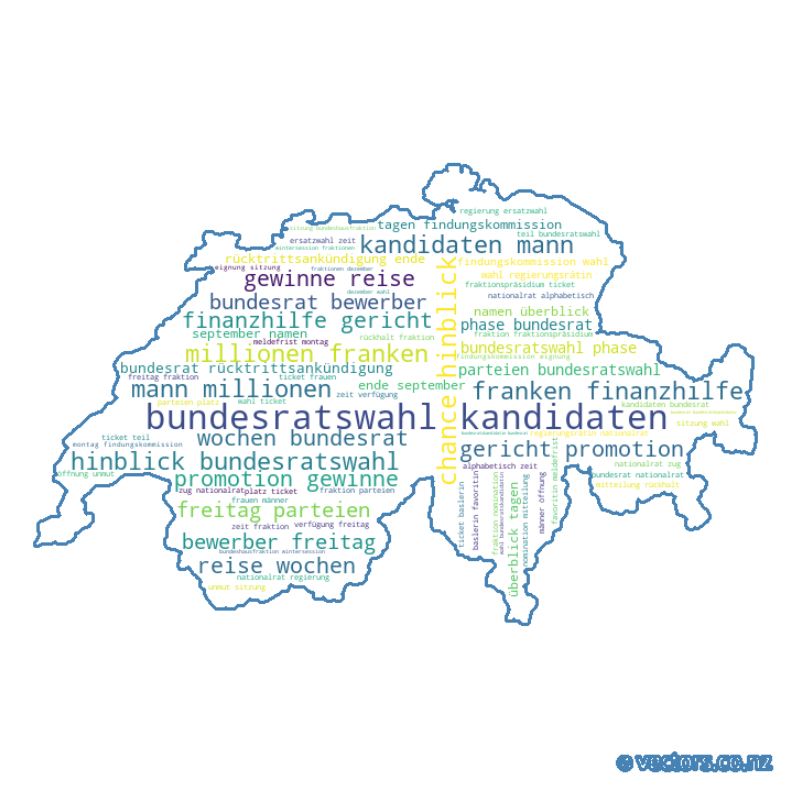

In [116]:

### Rest mit spacy
#v1
doc = nlp(text)
substantive = []
#lemmas = [str(token.lemma_) for token in doc]
for token in doc:
    if "NOUN" in token.pos_:
        substantive.append(str(token.lemma_))
text = (" ").join(substantive)

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

maske = np.array(Image.open(path.join(d, "maske.png")))

wc = WordCloud(collocation_threshold=1,background_color="white", max_words=2000, mask=maske, contour_width=3, contour_color='steelblue',collocations=True, normalize_plurals=False)
wc.generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:

#v2
#for token in doc:
#    if "NOUN" in token.pos_:
#        substantive.append(str(token))
#text = (" ").join(substantive)
text

- Wenn man viele files hat und jedes verarbeiten möchte, kann man daraus eine funktion machen.  Wie z.B. hier:

In [ ]:
result = []
def process_text(text):
    words = word_tokenize(text)
    words_german =[word.lower() for word in words if word.isalpha()]
    lemma = nltk.WordNetLemmatizer()
    lemmas = [lemma.lemmatize(i) for i in words_german]
    result = [word for word in lemmas if word not in stopwords]
    return result

#for file in files:
#    result.append(process_text(file))